In [110]:
"""
Exercise 4: Multi-Class Classification
Neural Network Classification - Module 3

This exercise covers:
- Creating multi-class data with make_blobs
- Building multi-class models
- Using CrossEntropyLoss
- Converting logits with softmax
- Using argmax for predictions

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""


'\nExercise 4: Multi-Class Classification\nNeural Network Classification - Module 3\n\nThis exercise covers:\n- Creating multi-class data with make_blobs\n- Building multi-class models\n- Using CrossEntropyLoss\n- Converting logits with softmax\n- Using argmax for predictions\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [111]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [112]:

# ============================================
# Part 1: Creating make_blobs Dataset
# ============================================

print("=" * 60)
print("Part 1: Creating make_blobs Dataset")
print("=" * 60)

# TODO: Create make_blobs dataset
n_samples = 1000
n_classes = 4

X, y = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=n_classes,
    cluster_std=1.5,
    random_state=42
)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Number of classes: {len(set(y))}")

for class_id in range(n_classes):
    print(f"  Class {class_id}: {sum(y == class_id)} samples")


Part 1: Creating make_blobs Dataset
X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples



Part 2: Visualizing the Data


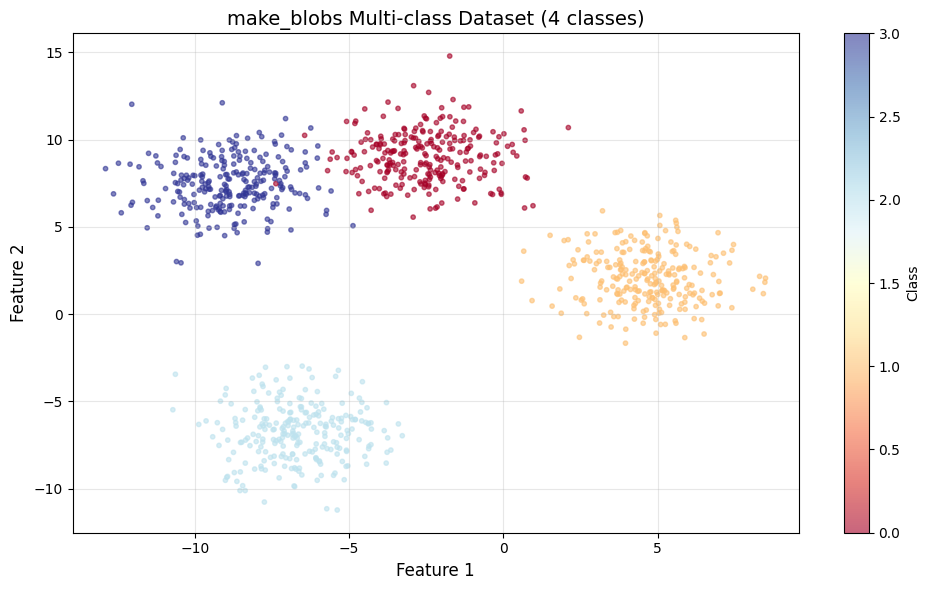

Visualization created!
Motto: Visualize, visualize, visualize!


In [113]:

# ============================================
# Part 2: Visualizing the Data
# ============================================

print("\n" + "=" * 60)
print("Part 2: Visualizing the Data")
print("=" * 60)

# TODO: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title(f'make_blobs Multi-class Dataset ({n_classes} classes)', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")


In [114]:

# ============================================
# Part 3: Train/Test Split and Conversion
# ============================================

print("\n" + "=" * 60)
print("Part 3: Train/Test Split and Conversion")
print("=" * 60)

# TODO: Split data (stratified for multi-class)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

# TODO: Convert to PyTorch tensors
# IMPORTANT: For multi-class, y should be LongTensor (class indices)
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"\nTensor shapes:")
print(f"X_train: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train: {y_train.shape}, dtype: {y_train.dtype}")
print(f"X_test: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_test: {y_test.shape}, dtype: {y_test.dtype}")



Part 3: Train/Test Split and Conversion
Training size: 800
Test size: 200

Using device: cpu

Tensor shapes:
X_train: torch.Size([800, 2]), dtype: torch.float32
y_train: torch.Size([800]), dtype: torch.int64
X_test: torch.Size([200, 2]), dtype: torch.float32
y_test: torch.Size([200]), dtype: torch.int64


In [115]:

# ============================================
# Part 4: Building Multi-Class Model
# ============================================

print("\n" + "=" * 60)
print("Part 4: Building Multi-Class Model")
print("=" * 60)

# TODO: Define multi-class model
class BlobModel(nn.Module):
    """Multi-class classifier"""
    def __init__(self, input_size=2, hidden_size=16, num_classes=4):
        super(BlobModel, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
            # Note: No softmax here (output is logits)
        )

    def forward(self, x):
        return self.layer_stack(x)

model = BlobModel(input_size=2, hidden_size=16, num_classes=n_classes)
model = model.to(device)

print("BlobModel (Multi-class):")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")



Part 4: Building Multi-Class Model
BlobModel (Multi-class):
BlobModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=4, bias=True)
  )
)

Total parameters: 116


In [116]:

# ============================================
# Part 5: Loss Function and Optimizer
# ============================================

print("\n" + "=" * 60)
print("Part 5: Loss Function and Optimizer")
print("=" * 60)

# TODO: Use CrossEntropyLoss for multi-class
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: CrossEntropyLoss()")
print(f"Optimizer: Adam (lr=0.01)")

print("\nKey differences from binary:")
print("  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]")
print("  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]")



Part 5: Loss Function and Optimizer
Loss function: CrossEntropyLoss()
Optimizer: Adam (lr=0.01)

Key differences from binary:
  - Binary: BCEWithLogitsLoss, y is FloatTensor with shape [N, 1]
  - Multi-class: CrossEntropyLoss, y is LongTensor with shape [N]


In [117]:

# ============================================
# Part 6: Training Loop
# ============================================

print("\n" + "=" * 60)
print("Part 6: Training Loop")
print("=" * 60)

def train_model(model, epochs=100):
    train_losses = []
    train_accuracies = []
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)


    model.train()
    for epoch in range(epochs):
        # Forward pass
        y_logits = model(X_train)

        # Calculate loss
        loss = criterion(y_logits, y_train)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())
        with torch.no_grad():
            y_pred = torch.argmax(y_logits, dim=1)
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')
        
    return train_losses, train_accuracies

print("\nTraining complete!")
train_losses, train_accuracies = train_model(model)



Part 6: Training Loop

Training complete!
Epoch [10/100], Loss: 0.4020, Acc: 83.63%
Epoch [20/100], Loss: 0.1678, Acc: 99.25%
Epoch [30/100], Loss: 0.0880, Acc: 98.50%
Epoch [40/100], Loss: 0.0564, Acc: 99.12%
Epoch [50/100], Loss: 0.0426, Acc: 99.12%
Epoch [60/100], Loss: 0.0366, Acc: 99.25%
Epoch [70/100], Loss: 0.0331, Acc: 99.25%
Epoch [80/100], Loss: 0.0307, Acc: 99.25%
Epoch [90/100], Loss: 0.0288, Acc: 99.25%
Epoch [100/100], Loss: 0.0275, Acc: 99.25%


In [118]:

# ============================================
# Part 7: The Logits → Softmax → Argmax Pipeline
# ============================================

print("\n" + "=" * 60)
print("Part 7: Logits → Probabilities → Labels Pipeline")
print("=" * 60)

# Make predictions
model.eval()
with torch.inference_mode():
    test_logits = model(X_test)

    # Convert to probabilities using softmax
    test_probs = torch.softmax(test_logits, dim=1)

    # Convert to labels using argmax
    test_preds = torch.argmax(test_probs, dim=1)

# Show examples
print("\nFirst 3 predictions:")
for i in range(3):
    print(f"\nSample {i+1}:")
    print(f"  Logits: {test_logits[i].cpu().numpy()}")
    print(f"  Probabilities: {test_probs[i].cpu().numpy()}")
    print(f"  Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")

# Calculate test accuracy
test_accuracy = (test_preds == y_test).float().mean()
print(f"\nTest Accuracy: {test_accuracy.item()*100:.2f}%")



Part 7: Logits → Probabilities → Labels Pipeline

First 3 predictions:

Sample 1:
  Logits: [-5.6822906 -4.3854437  5.193898  -3.7657669]
  Probabilities: [1.8898938e-05 6.9127462e-05 9.9978346e-01 1.2846143e-04]
  Predicted: 2, Actual: 2

Sample 2:
  Logits: [ 0.6101078  9.1367655 -5.4092436 -8.655635 ]
  Probabilities: [1.9807662e-04 9.9980146e-01 4.8157318e-07 1.8740124e-08]
  Predicted: 1, Actual: 1

Sample 3:
  Logits: [ -4.5113225 -11.180926   -5.722314    2.0033326]
  Probabilities: [1.4787207e-03 1.8763498e-06 4.4051351e-04 9.9807894e-01]
  Predicted: 3, Actual: 3

Test Accuracy: 99.50%



Part 8: Decision Boundary Visualization


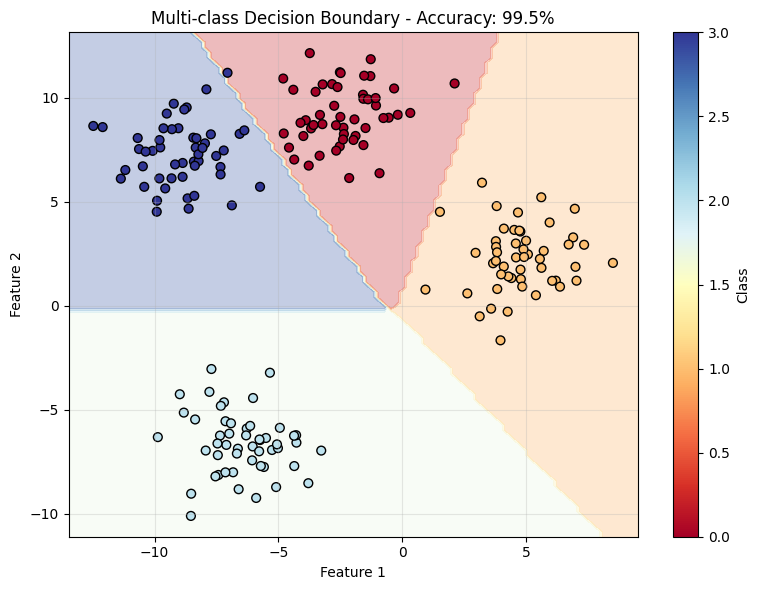

In [119]:

# ============================================
# Part 8: Decision Boundary Visualization
# ============================================

print("\n" + "=" * 60)
print("Part 8: Decision Boundary Visualization")
print("=" * 60)

def plot_multi_class_decision_boundary(model, X, y, title):
    """Plot decision boundary for multi-class model"""
    model.eval()

    # Create meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Make predictions on meshgrid
    mesh = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
    with torch.inference_mode():
        Z = torch.argmax(model(mesh), dim=1).reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z.cpu().numpy(), alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdYlBu', edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()

# Plot decision boundary
X_test_np = X_test.cpu().numpy()
y_test_np = y_test.cpu().numpy()

plot_multi_class_decision_boundary(
    model, X_test_np, y_test_np,
    f'Multi-class Decision Boundary - Accuracy: {test_accuracy.item()*100:.1f}%'
)


In [120]:

# ============================================
# Part 9: Per-Class Accuracy
# ============================================

print("\n" + "=" * 60)
print("Part 9: Per-Class Accuracy")
print("=" * 60)

for class_id in range(n_classes):
    class_mask = y_test == class_id
    class_acc = (test_preds[class_mask] == y_test[class_mask]).float().mean()
    print(f"Class {class_id} Accuracy: {class_acc.item()*100:.2f}%")



Part 9: Per-Class Accuracy
Class 0 Accuracy: 100.00%
Class 1 Accuracy: 100.00%
Class 2 Accuracy: 100.00%
Class 3 Accuracy: 98.00%


In [121]:

# ============================================
# Exercises
# ============================================

print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)



Exercises



Exercise 1: Vary number of classes
Try different numbers of classes:
  - n_classes=2 (binary)
  - n_classes=3
  - n_classes=4 (default)
  - n_classes=5
Tip: Modify the 'n_classes' and 'centers' parameters
X shape: (1500, 2)
y shape: (1500,)
Number of classes: 2
  Class 0: 750 samples
  Class 1: 750 samples


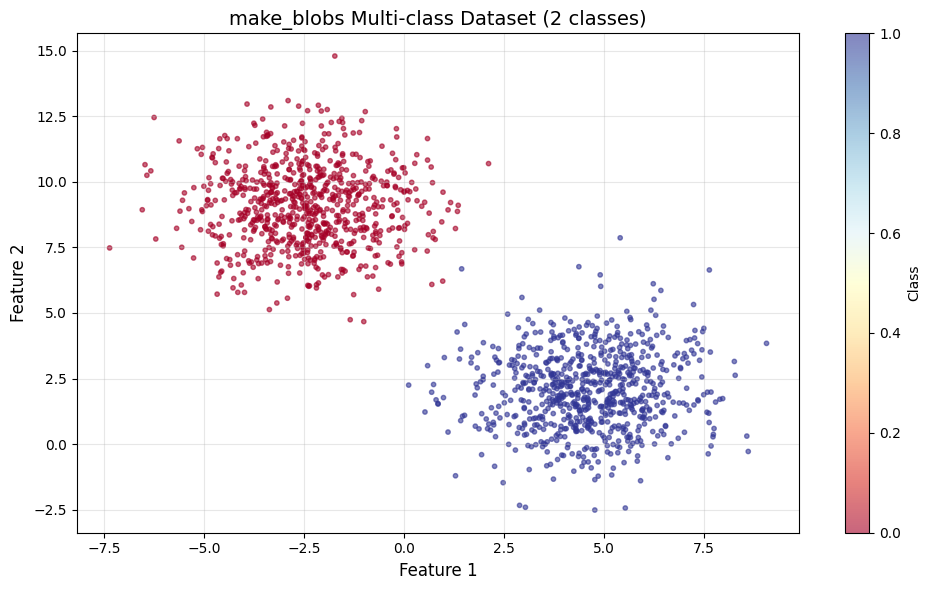

X shape: (1500, 2)
y shape: (1500,)
Number of classes: 3
  Class 0: 500 samples
  Class 1: 500 samples
  Class 2: 500 samples


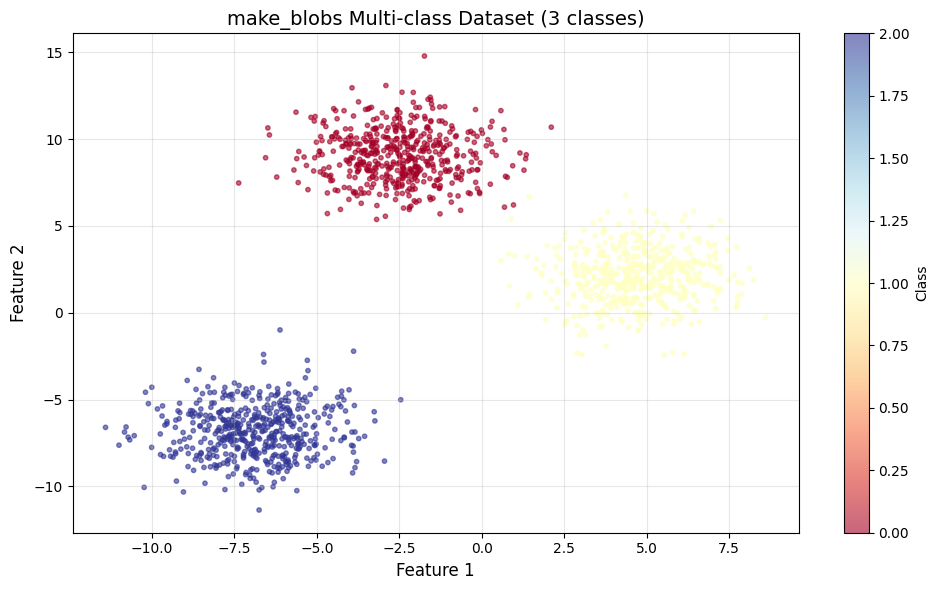

X shape: (1500, 2)
y shape: (1500,)
Number of classes: 4
  Class 0: 375 samples
  Class 1: 375 samples
  Class 2: 375 samples
  Class 3: 375 samples


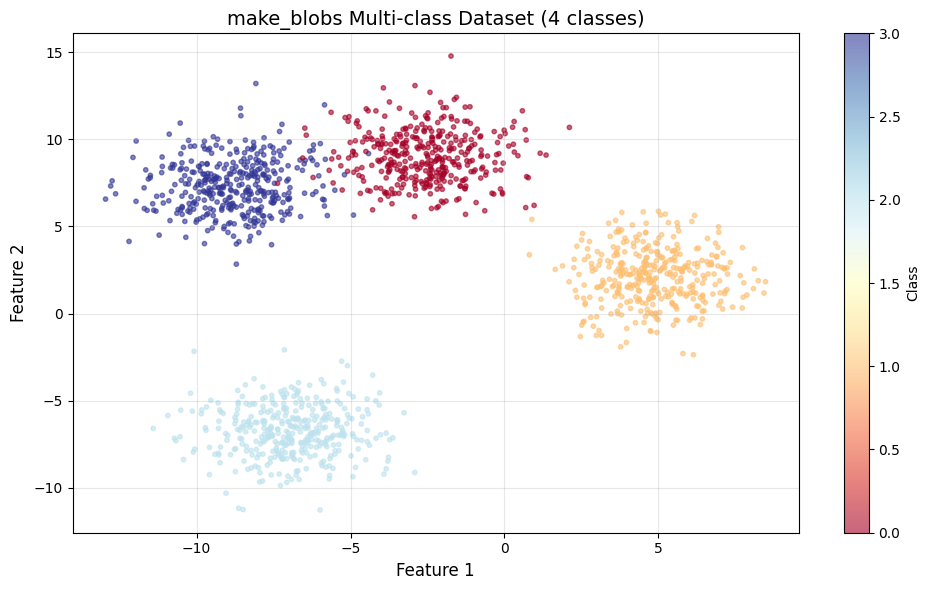

X shape: (1500, 2)
y shape: (1500,)
Number of classes: 5
  Class 0: 300 samples
  Class 1: 300 samples
  Class 2: 300 samples
  Class 3: 300 samples
  Class 4: 300 samples


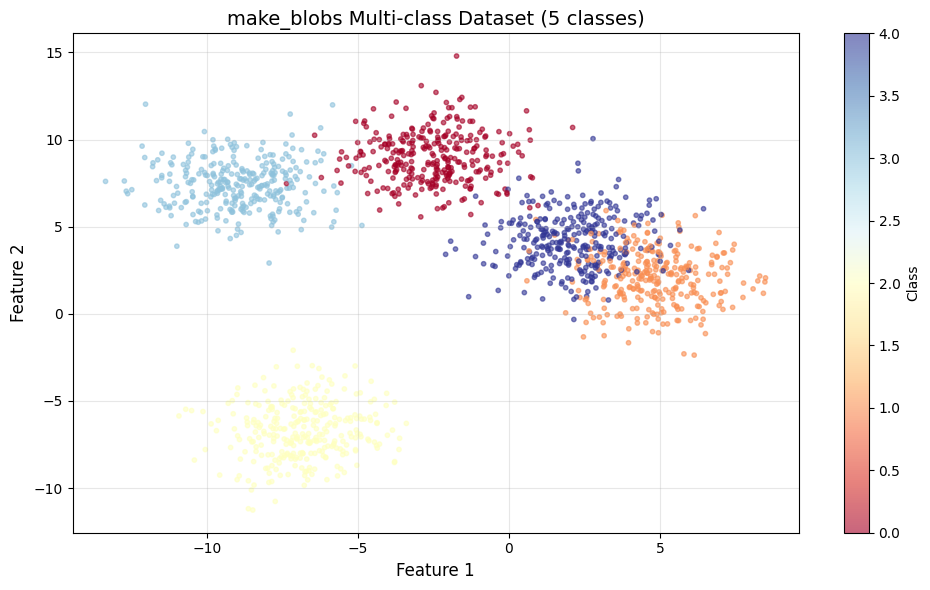

In [122]:

# Exercise 1: Vary number of classes
print("\nExercise 1: Vary number of classes")
print("Try different numbers of classes:")
print("  - n_classes=2 (binary)")
print("  - n_classes=3")
print("  - n_classes=4 (default)")
print("  - n_classes=5")
print("Tip: Modify the 'n_classes' and 'centers' parameters")


array = [2, 3, 4, 5]
n_samples = 1500
for n_classes in array:
    X1, y1 = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=n_classes,
        cluster_std=1.5,
        random_state=42
    )

    print(f"X shape: {X1.shape}")
    print(f"y shape: {y1.shape}")
    print(f"Number of classes: {len(set(y1))}")

    for class_id in range(n_classes):
        print(f"  Class {class_id}: {sum(y1 == class_id)} samples")

    plt.figure(figsize=(10, 6))
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='RdYlBu', s=10, alpha=0.6)
    plt.title(f'make_blobs Multi-class Dataset ({n_classes} classes)', fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()




Exercise 2: Change cluster overlap
Try different cluster_std values:
  - cluster_std=0.5 (tight clusters)
  - cluster_std=1.5 (default)
  - cluster_std=3.0 (overlapping clusters)
Tip: Modify the 'cluster_std' parameter in make_blobs()
X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples


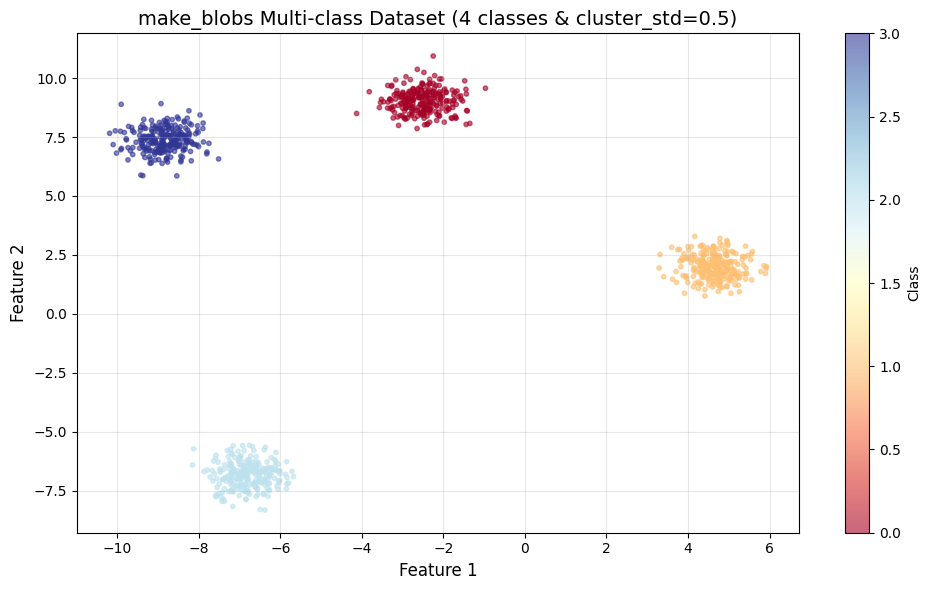

X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples


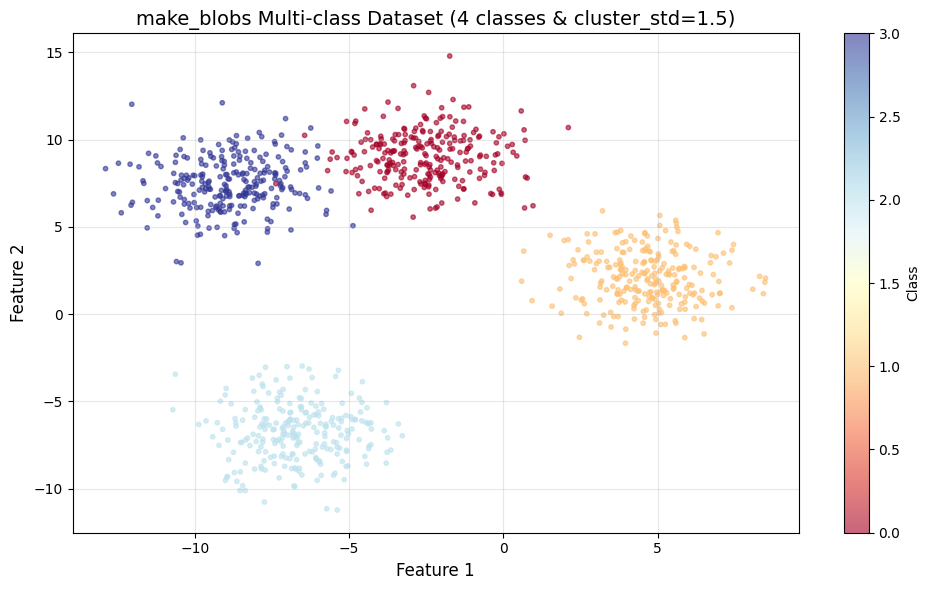

X shape: (1000, 2)
y shape: (1000,)
Number of classes: 4
  Class 0: 250 samples
  Class 1: 250 samples
  Class 2: 250 samples
  Class 3: 250 samples


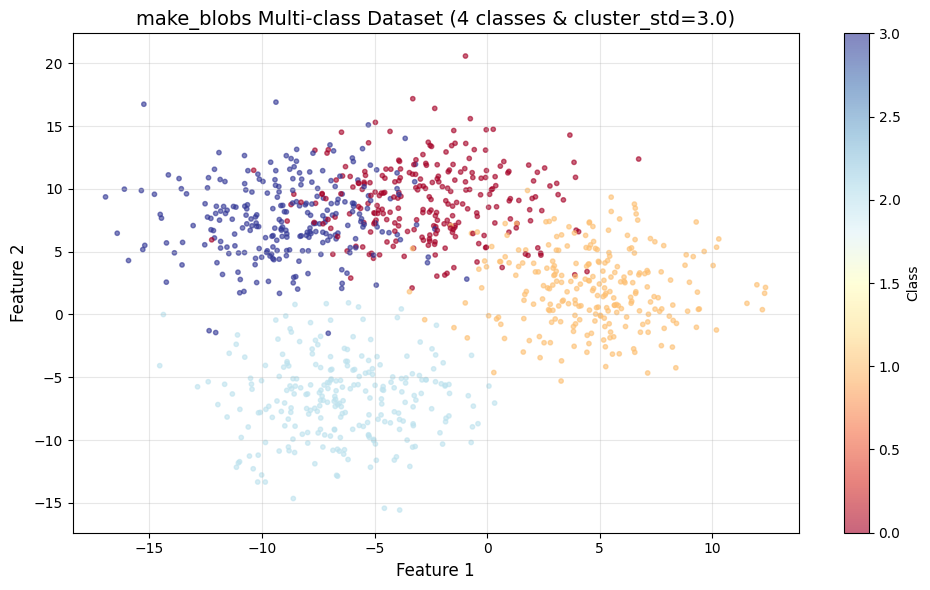

In [123]:

# Exercise 2: Change cluster standard deviation
print("\nExercise 2: Change cluster overlap")
print("Try different cluster_std values:")
print("  - cluster_std=0.5 (tight clusters)")
print("  - cluster_std=1.5 (default)")
print("  - cluster_std=3.0 (overlapping clusters)")
print("Tip: Modify the 'cluster_std' parameter in make_blobs()")

array_std = [0.5, 1.5, 3.0]
n_samples = 1000
n_classes = 4
for cluster_std in array_std:
    X1, y1 = make_blobs(
        n_samples=n_samples,
        n_features=2,
        centers=4,
        cluster_std=cluster_std,
        random_state=42
    )

    print(f"X shape: {X1.shape}")
    print(f"y shape: {y1.shape}")
    print(f"Number of classes: {len(set(y1))}")

    for class_id in range(n_classes):
        print(f"  Class {class_id}: {sum(y1 == class_id)} samples")

    plt.figure(figsize=(10, 6))
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='RdYlBu', s=10, alpha=0.6)
    plt.title(f'make_blobs Multi-class Dataset ({n_classes} classes & cluster_std={cluster_std})', fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class')
    plt.tight_layout()
    plt.show()

In [124]:

# Exercise 3: Compare binary vs multi-class
print("\nExercise 3: Compare binary vs multi-class")
print("Questions to answer:")
print("  - How is binary different from multi-class?")
print(" Answer: multi-class means y has more than 2 unique labels")

print("  - What's different about the loss function?")
print(""" Answer: 
\t+ Binary classification uses: BCEWithLogitsLoss() because the model predicts a probability for class 1.
\t+ Multi-class classification uses: CrossEntropyLoss() because the model must choose between multiple classes.""")

print("  - What's different about the output activation?")
print(""" Answer: 
\t+ Binary classification uses: sigmoid()
\t+ Multi-class classification uses: softmax()""")

print("Tip: Look at BCEWithLogitsLoss vs CrossEntropyLoss")



Exercise 3: Compare binary vs multi-class
Questions to answer:
  - How is binary different from multi-class?
 Answer: multi-class means y has more than 2 unique labels
  - What's different about the loss function?
 Answer: 
	+ Binary classification uses: BCEWithLogitsLoss() because the model predicts a probability for class 1.
	+ Multi-class classification uses: CrossEntropyLoss() because the model must choose between multiple classes.
  - What's different about the output activation?
 Answer: 
	+ Binary classification uses: sigmoid()
	+ Multi-class classification uses: softmax()
Tip: Look at BCEWithLogitsLoss vs CrossEntropyLoss



Exercise 4: Experiment with model size
Try different model sizes:
  - hidden_size=8
  - hidden_size=16 (default)
  - hidden_size=32
Tip: Modify the 'hidden_size' parameter in BlobModel()
Epoch [10/100], Loss: 0.7426, Acc: 64.38%
Epoch [20/100], Loss: 0.3964, Acc: 99.00%
Epoch [30/100], Loss: 0.2072, Acc: 97.12%
Epoch [40/100], Loss: 0.1120, Acc: 99.12%
Epoch [50/100], Loss: 0.0754, Acc: 99.00%
Epoch [60/100], Loss: 0.0572, Acc: 99.00%
Epoch [70/100], Loss: 0.0450, Acc: 99.12%
Epoch [80/100], Loss: 0.0378, Acc: 99.12%
Epoch [90/100], Loss: 0.0336, Acc: 99.12%
Epoch [100/100], Loss: 0.0315, Acc: 99.25%


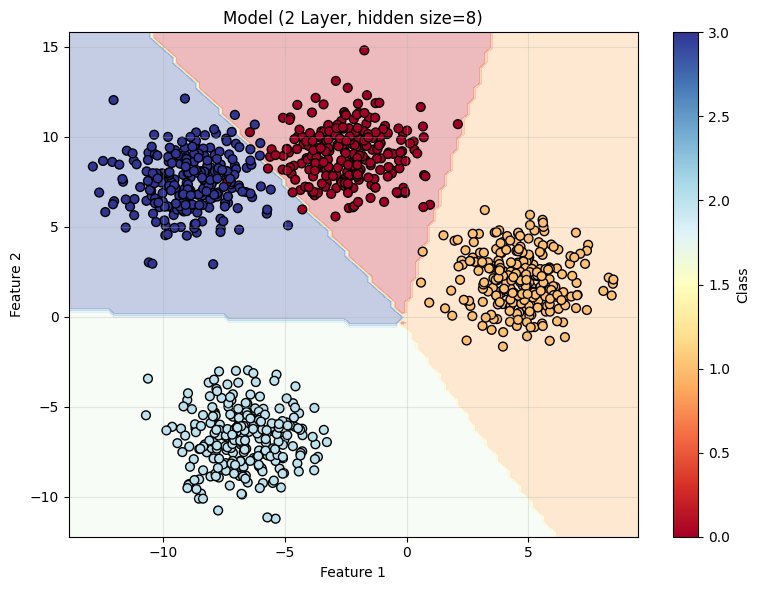

Epoch [10/100], Loss: 0.4729, Acc: 90.00%
Epoch [20/100], Loss: 0.1509, Acc: 99.00%
Epoch [30/100], Loss: 0.0792, Acc: 99.12%
Epoch [40/100], Loss: 0.0560, Acc: 99.12%
Epoch [50/100], Loss: 0.0458, Acc: 99.12%
Epoch [60/100], Loss: 0.0402, Acc: 99.25%
Epoch [70/100], Loss: 0.0368, Acc: 99.12%
Epoch [80/100], Loss: 0.0344, Acc: 99.25%
Epoch [90/100], Loss: 0.0327, Acc: 99.25%
Epoch [100/100], Loss: 0.0313, Acc: 99.25%


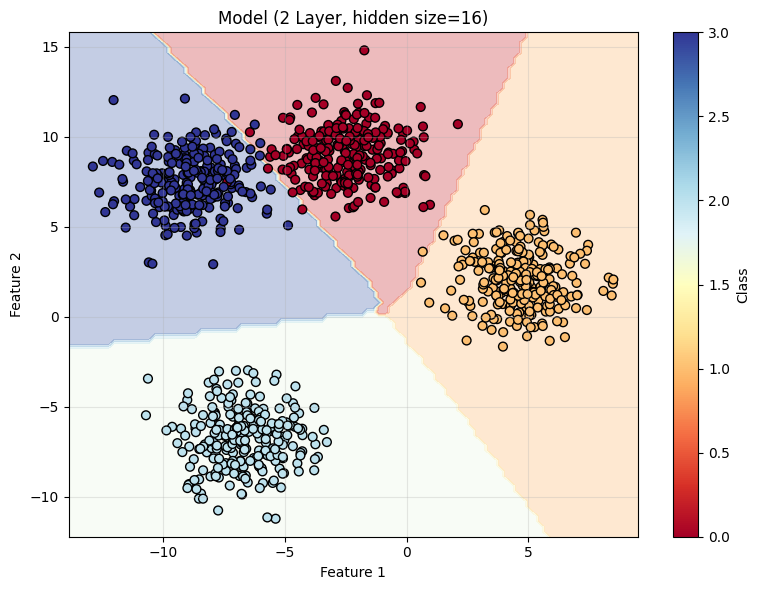

Epoch [10/100], Loss: 0.0821, Acc: 99.25%
Epoch [20/100], Loss: 0.0343, Acc: 99.12%
Epoch [30/100], Loss: 0.0276, Acc: 99.25%
Epoch [40/100], Loss: 0.0258, Acc: 99.25%
Epoch [50/100], Loss: 0.0249, Acc: 99.25%
Epoch [60/100], Loss: 0.0242, Acc: 99.25%
Epoch [70/100], Loss: 0.0237, Acc: 99.25%
Epoch [80/100], Loss: 0.0232, Acc: 99.25%
Epoch [90/100], Loss: 0.0227, Acc: 99.25%
Epoch [100/100], Loss: 0.0224, Acc: 99.37%


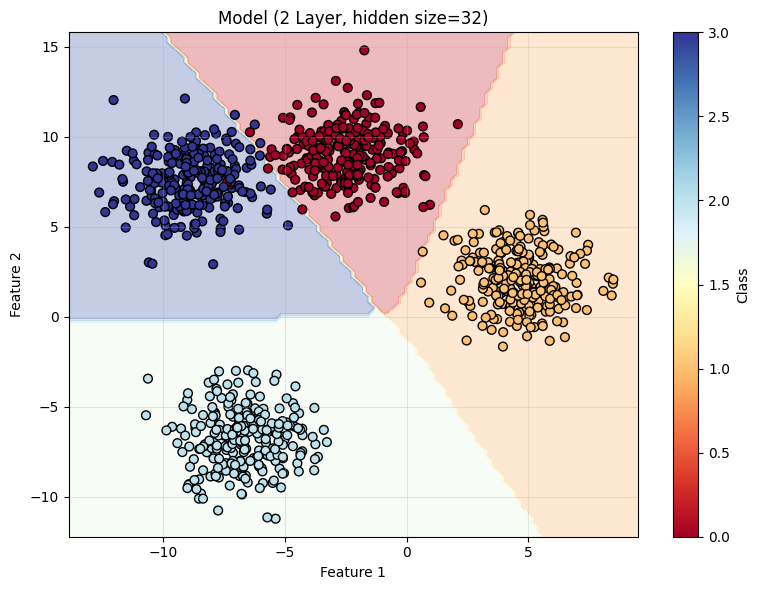


Exercise 5: Add more hidden layers
Try deeper architectures:
  - Add another hidden layer
  - Experiment with different widths
Tip: Modify BlobModel to add more layers

Exercise 4 Complete!
Remember: If in doubt, run the code!
Remember: Experiment, experiment, experiment!
Remember: Visualize, visualize, visualize!


In [ ]:

# Exercise 4: Experiment with model size
print("\nExercise 4: Experiment with model size")
print("Try different model sizes:")
print("  - hidden_size=8")
print("  - hidden_size=16 (default)")
print("  - hidden_size=32")
print("Tip: Modify the 'hidden_size' parameter in BlobModel()")

hs_array = [8, 16, 32]

for hidden_size in hs_array:
    model = BlobModel(2, hidden_size)
    train_model(model)
    plot_multi_class_decision_boundary(model, X, y, f"Model (2 Layer, hidden size={hidden_size})")



Exercise 5: Add more hidden layers
Try deeper architectures:
  - Add another hidden layer
  - Experiment with different widths
Tip: Modify BlobModel to add more layers
Epoch [10/100], Loss: 0.2226, Acc: 97.62%
Epoch [20/100], Loss: 0.0653, Acc: 97.62%
Epoch [30/100], Loss: 0.0586, Acc: 97.75%
Epoch [40/100], Loss: 0.0556, Acc: 97.62%
Epoch [50/100], Loss: 0.0544, Acc: 97.62%
Epoch [60/100], Loss: 0.0537, Acc: 97.75%
Epoch [70/100], Loss: 0.0530, Acc: 97.87%
Epoch [80/100], Loss: 0.0526, Acc: 97.87%
Epoch [90/100], Loss: 0.0521, Acc: 97.87%
Epoch [100/100], Loss: 0.0517, Acc: 97.87%


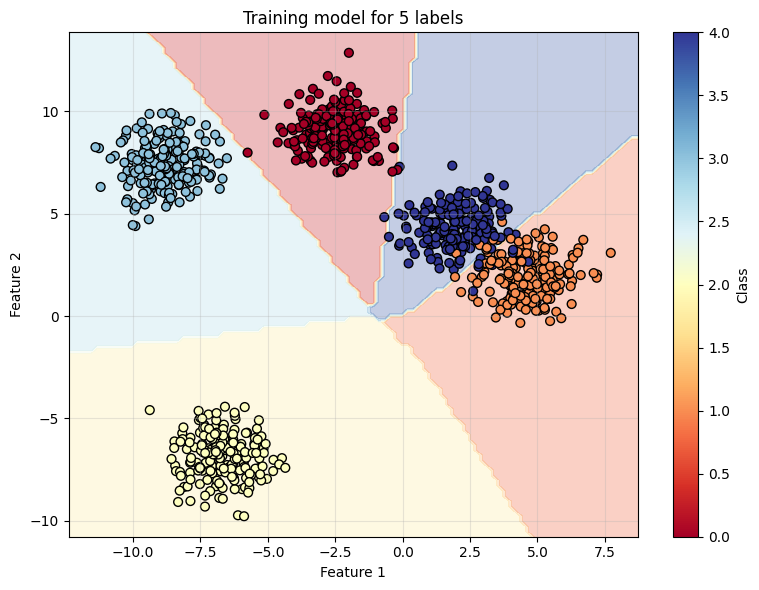

In [130]:

# Exercise 5: Add more hidden layers
print("\nExercise 5: Add more hidden layers")
print("Try deeper architectures:")
print("  - Add another hidden layer")
print("  - Experiment with different widths")
print("Tip: Modify BlobModel to add more layers")

X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

class BlobModelV1(nn.Module):
    def __init__(self, input_size=2, hidden_size=32, n_classes=5):
        super(BlobModelV1, self).__init__()
        self.layer_stack= nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_classes)
        )
    def forward(self, x):
        return self.layer_stack(x)
    
model = BlobModelV1()
train_model(model)
plot_multi_class_decision_boundary(model, X, y, "Training model for 5 labels")

In [131]:

print("\n" + "=" * 60)
print("Exercise 4 Complete!")
print("Remember: If in doubt, run the code!")
print("Remember: Experiment, experiment, experiment!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)



Exercise 4 Complete!
Remember: If in doubt, run the code!
Remember: Experiment, experiment, experiment!
Remember: Visualize, visualize, visualize!
